**Compuertas cuánticas**

Anteriormente hemos visto mediante la librería **Qiskit** cómo hacer mediciones, ya sea en un simulador o en un computador cuántico real, pero, aún no hemos hecho operaciones sobre nuestro circuito para obtener ciertos resultados. En este caso mostraremos algunos operadores o también llamadas en este caso **compuertas cuánticas** que generarán cambios en nuestro vector de estado.

**Compuerta de Hadamard**

Dicha compuerta prepara nuestro estado vector inicial, es decir, dado que nuestro circuito comienza con el estado base $|0⟩$, necesitamos un vector estado con la superposición de $|1⟩$ y $|0⟩$, en el caso de que tengamos el estado base inicial $|1⟩$ que es posible obtenerlo aplicando al estado base $|0⟩$ la compuerta cuántica**X**, podemos obtener también una superposición de  $|1⟩$ y $|0⟩$ de la siguiente forma: 
$$\textbf{H}|0⟩=\frac{1}{\sqrt{2}}(|0⟩+|1⟩)=|+⟩,$$
$$\textbf{H}|1⟩=\frac{1}{\sqrt{2}}(|0⟩-|1⟩)=|-⟩.$$
Si notamos dicha aplicación del operador $\textit{H}$, llamado **compuerta Hadamard**, lo que hace es hacer una rotación sobre la esfera de Bloch tal que si esta ubicado en $\hat{z}$ rotarlo a $\hat{x}$ y si esta en $-\hat{z}$ rotarlo a $-\hat{x}$, si volvemos a aplicar el operador a los resultados anteriores obtenemos:
$$\textbf{H}|+⟩=|0⟩,$$
$$\textbf{H}|-⟩=|1⟩,$$ es decir, que devuelve la rotación.

La forma de obtener los elementos de la matriz es la siguiente:
$$\textbf{H}=\begin{bmatrix}
H_{00} & H_{01}\\
H_{10} & H_{11} 
\end{bmatrix}$$
$$H_{00}= ⟨0|\textbf{H}|0⟩ =\frac{1}{\sqrt{2}}$$
$$H_{10}= ⟨1|\textbf{H}|0⟩ =\frac{1}{\sqrt{2}}$$
$$H_{01}= ⟨0|\textbf{H}|1⟩ =\frac{1}{\sqrt{2}}$$
$$H_{11}= ⟨1|\textbf{H}|1⟩ =-\frac{1}{\sqrt{2}}$$
$$\textbf{H}=\frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\
1 & -1 
\end{bmatrix}$$

Para ver la aplicación de este operador en un circuito, inicialmente construimos el circuito cuántico inicial, en este caso para 1 qubit de la siguietne forma:

In [2]:
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Statevector

In [18]:
circuito_1 = QuantumCircuit(1)

Para aplicar el operador $\textbf{H}$ usamos el método **h()**

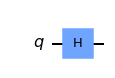

In [19]:
circuito_1.h(0)
circuito_1.draw("mpl")

In [20]:
estado = Statevector.from_int(0,2**1)
estado = estado.evolve(circuito_1)
estado.draw("latex")

<IPython.core.display.Latex object>

es de aclarar que: $$\frac{1}{\sqrt{2}}=\frac{\sqrt{2}}{2}.$$

Es de aclarar que el método **h()** pide como parámetro la posición de qubit al cual se le va a aplicar el operador, es decir que si, se aplica al tercer qubit, entonces la forma es **self.h(2)**. Si aplicamos de nuevo el operador $\textbf{H}$ obtenemos lo siguiente:

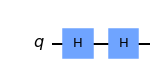

In [21]:
circuito_1.h(0)
circuito_1.draw("mpl")

In [22]:
estado = Statevector.from_int(0,2**1)
estado = estado.evolve(circuito_1)
estado.draw("latex")

<IPython.core.display.Latex object>

Es decir, el estado original.

**Matrices de Pauli**

En este caso, las matrices de Pauli son operadores útiles a la hora de generar rotaciones en la esfera de Bloch los cuales son:

\begin{equation}
    \textbf{X}=\sigma_{1}=\sigma_{x}=\begin{bmatrix}
                    0 & 1\\
                    1 & 0
                \end{bmatrix}
\end{equation}

\begin{equation}
    \textbf{Y}=\sigma_{2}=\sigma_{y}=\begin{bmatrix}
                    0 & -i\\
                    i & 0
                \end{bmatrix}
\end{equation}

\begin{equation}
    \textbf{Z}=\sigma_{3}=\sigma_{z}=\begin{bmatrix}
                    1 & 0\\
                    0 & -1
                \end{bmatrix}
\end{equation}
En algunos casos es llamado $\sigma_{0}$ como la matriz identidad $\textbf{I}$

Estas matrices contienen propiedades interesantes: 1) Unitarias 2) Siendo su matriz
traspuesta también matriz inversa. 3) Hermítica, tal que, al sacar su traspuesta y sacar la conjugada de los
elementos, se obtiene la misma matriz (si es del gusto de lector puede comprobar que esto es cierto con
las matrices anteriores). Otra propiedad interesante de estas matrices es que son matrices involutivas, es
decir, la matriz es su misma inversa tal que se cumple lo siguiente:

\begin{equation}
    \sigma_{x}^2=\sigma_{y}^2=\sigma_{z}^2=\begin{bmatrix}
                    1 & 0\\
                    0 & 1
                \end{bmatrix}=\textbf{I}
\end{equation}

Asimismo, si obtenemos el determinante y la traza de estas matrices siempre obtendremos los siguientes valores:

\begin{equation}
    det(\sigma_{j})=-1
\end{equation}

\begin{equation}
    Tr(\sigma_{j})=0
\end{equation}


Al operar una matriz de Pauli sobre otra distinta a la anterior obenemos la matriz de Pauli sobrante acompañada de la unidad imaginaria, es decir:

\begin{equation}
    \sigma_{y}\sigma_{z} = i\sigma_{x}
\end{equation}

\begin{equation}
    \sigma_{x}\sigma_{y} = i\sigma_{z}
\end{equation}

\begin{equation}
    \sigma_{z}\sigma_{x} = i\sigma_{y}
\end{equation}

Aprovechando estas matrices de Pauli y la matriz identidad, podemos generar una nueva matriz hermítica, que también es aplicable como operador siguiendo la siguiente relación:

\begin{equation}
    M=\lambda_{0}I+ \sum_{j=1}^3\lambda_{j}\sigma_{j}
\end{equation}


Donde $\lambda_{0}$, $\lambda_{1}$, $\lambda_{2}$ y $\lambda_{3}$ son números complejos cualesquiera, y $M$ la matriz hermítica resultante.


Al aplicar el compuerta $\textbf{X}$ sobre $|0⟩$ y $|1⟩$ respectivamente obtenemos:
$$\textbf{X}|0⟩=|1⟩$$
$$\textbf{X}|1⟩=|0⟩$$
es decir, aplica una rotación de $180^{\circ}$ en el eje x de la esfera de Bloch.



Ahora, al aplicar la compuerta $\textbf{Y}$ sobre $|+⟩$ , $|-⟩$, $|0⟩$ y $|1⟩$ respectivamente, obtenemos lo siguiente:
$$\textbf{Y}|+⟩=-i|-⟩$$
$$\textbf{Y}|-⟩=i|+⟩$$
$$\textbf{Y}|0⟩=i|1⟩$$
$$\textbf{Y}|1⟩=-i|0⟩$$
Es decir que al operar sobre las bases $-\hat{z}$ y $\hat{x}$, aplica una rotación de $180^{\circ}$ con respecto al eje y en la esfera de Bloch, además aplica una fase global de $\pi$, se de aclarar que las fases globales no afectan los resultados obtenidos en el sistema con lo cual, al graficar, no tendremos en cuenta la fase aplicada $e^{i\pi}=-i$, si no solo la base. Para las bases $\hat{z}$ y $-\hat{x}$, también aplica una rotación $180^{\circ}$, en este caso aplicando una fase global de $\frac{\pi}{2}$, es decir, $e^{i\frac{\pi}{2}}=i$, 

Finalmenete, con la matriz **Z**, lo que hace es rotar $180^{\circ}$ con respecto a la coordenada z, tal que sucede lo siguiente con los estados base:
$$\textbf{Z}|+⟩=|-⟩$$
$$\textbf{Z}|-⟩=|+⟩$$


la forma de las matrices **Y** y **Z** en qiskit es con el método **y()** y **z()**, el parámetro escencial que pide es la posición de qubit al cual se opera.

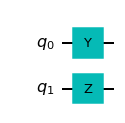

In [114]:
circuito_2 = QuantumCircuit(2)
circuito_2.y(0)
circuito_2.z(1)
circuito_2.draw("mpl")


**Compuerta CNOT**

La compuerta **CNOT** es llamada también compuerta **Controlled-Not**, es la encargada de cambiar las bases de un qubit dado una condición, donde el primer qubit es llamado control y el segundo qubit desear cambiar teniendo en cuenta el primero es llamado de objetivo. Es decir, cuando el primer qubit es $|1⟩$ se aplica el operador $\textbf{X}$ al segundo qubit y si el primer qubit es $|0⟩$ no hace nada, es decir: 
$$C_{not}|00⟩ = |00⟩,$$
$$C_{not}|10⟩ = |10⟩,$$
$$C_{not}|01⟩ = |11⟩,$$
$$C_{not}|11⟩ = |01⟩,$$
donde $C_{not}$ es la compuerta **CNOT**. La matriz representativa de $C_{not}$ es:

\begin{equation}
   C_{not}=\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
\end{bmatrix}.
\end{equation}
En el caso contrario que el primer qubit sea el objetivo y el segundo sea el de control entonces las condiciones cambian de la siguiente forma:
$$C_{not}|00⟩ = |00⟩,$$
$$C_{not}|01⟩ = |01⟩,$$
$$C_{not}|10⟩ = |11⟩,$$
$$C_{not}|11⟩ = |10⟩,$$
entonces, la matriz **CNOT** es:
\begin{equation}
   C_{not}=\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{bmatrix}.
\end{equation}

Con esto al usarla en qiskit llamamos la método **cx()** que necesita de dos parámetros, el primero es el qubit de control y el segundo al qubit objetivo, representado graficamente queda:

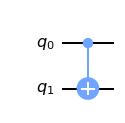

In [182]:
circuito_3 = QuantumCircuit(2)
circuito_3.cx(0,1)
circuito_3.draw("mpl")



Si aplicamos inversamente el operador, graficamente queda:

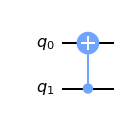

In [183]:
circuito_3 = QuantumCircuit(2)
circuito_3.cx(1,0)
circuito_3.draw("mpl")

**Compuerta toffoli**

En este caso, es una compuerta la cual, contiene dos qubits de control y uno objetivo en este caso, sea el primer qubit y el segundo de control y el tercero objetivo o el segundo y tercero de control y el primero de objetivo. en este caso, si el tercer y segundo qubit son los de control. entonces:
$$CC_{not}|000⟩ = |000⟩,$$
$$CC_{not}|001⟩ = |001⟩,$$
$$CC_{not}|010⟩ = |010⟩,$$
$$CC_{not}|011⟩ = |011⟩,$$
$$CC_{not}|100⟩ = |100⟩,$$
$$CC_{not}|101⟩ = |101⟩,$$
$$CC_{not}|110⟩ = |111⟩,$$
$$CC_{not}|111⟩ = |110⟩,$$
tal que la matriz $CC_{not}$ es la compuerta de toffoli representada matemáticamente como:
\begin{equation}
   CC_{not}=\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{bmatrix}.
\end{equation}
Caso contrario cuando, los qubits de control son el primero y el segundo y el qubit objetivo es el primero, entonces:
$$CC_{not}|000⟩ = |000⟩,$$
$$CC_{not}|001⟩ = |001⟩,$$
$$CC_{not}|010⟩ = |010⟩,$$
$$CC_{not}|011⟩ = |111⟩,$$
$$CC_{not}|100⟩ = |100⟩,$$
$$CC_{not}|101⟩ = |101⟩,$$
$$CC_{not}|110⟩ = |110⟩,$$
$$CC_{not}|111⟩ = |011⟩,$$
tal que la matriz $CC_{not}$ es representada matemáticamente como:
\begin{equation}
   CC_{not}=\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
\end{bmatrix}.
\end{equation}

Para usarlo dentro nuestro circuito cuántico en qiskit usamos el método **ccx()** donde el primer y segundo parámetro son los qubits de control y el tercero es el qubit objetivo, queda representado de la siguiente forma en el circuito:

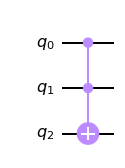

In [189]:
circuito_4 = QuantumCircuit(3)
circuito_4.ccx(0,1,2)
circuito_4.draw("mpl")

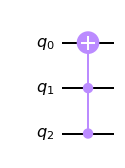

In [190]:
circuito_4 = QuantumCircuit(3)
circuito_4.ccx(2,1,0)
circuito_4.draw("mpl")

También es posible que los qubits de control sean el 1 y el 3 tal que el 2 sea el de objetivo.

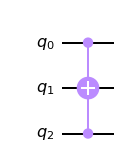

In [191]:
circuito_4 = QuantumCircuit(3)
circuito_4.ccx(0,2,1)
circuito_4.draw("mpl")

**compuerta Swap**

Esta compuerta también llamada operador intercambio de posición de qubit, es la encargada de escoger dos qubits e intercambiar su posición, es decir: $$\textbf{S}_{wap}|ab⟩=|ba⟩,$$
siendo $\textbf{S}_{wap}$ el operador de intercambio, es decir que para dos qubits tenemos los siguientes intercambios:
\begin{equation}
\textbf{S}_{wap}\left|00\right\rangle = \left|00\right\rangle,
\end{equation}
\begin{equation}
\textbf{S}_{wap}\left|11\right\rangle = \left|11\right\rangle,
\end{equation}
\begin{equation}
\textbf{S}_{wap}\left|10\right\rangle = \left|01\right\rangle,
\end{equation}
\begin{equation}
\textbf{S}_{wap}\left|01\right\rangle = \left|10\right\rangle,
\end{equation}
con esto, podemos obtener los elementos de la matriz $\textbf{S}_{wap}$ de la siguiente forma:
\begin{equation}
\langle00|\textbf{S}_{wap}\left|00\right\rangle = 1,
\end{equation}
\begin{equation}
\langle11|\textbf{S}_{wap}\left|11\right\rangle = 1,
\end{equation}
\begin{equation}
\langle01|\textbf{S}_{wap}\left|10\right\rangle = 1,
\end{equation}
\begin{equation}
\langle10|\textbf{S}_{wap}\left|01\right\rangle = 1,
\end{equation}

\begin{equation}
   \textbf{S}_{wap}=\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}.
\end{equation}

Esta compuerta dentro de Qiskit queda representada con el siguiente ejemplo:

In [9]:
Circuito = QuantumCircuit(2)
Circuito.x(0)
estado = Statevector.from_int(0,2**2)
estado = estado.evolve(Circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

In [12]:
Circuito.swap(0,1)
estado = Statevector.from_int(0,2**2)
estado = estado.evolve(Circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

Donde el método **swap()** es el que intercambia los qubits de posición, como primer parámetro pide la posición de primer qubit y como segundo parámetro la posición del segundo qubit, su dibujo representativo es:


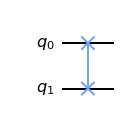

In [14]:
Circuito = QuantumCircuit(2)
Circuito.swap(0,1)
Circuito.draw("mpl")

También es posible generar un intercambio en posiciones que este separadas entre si, por ejemplo con 3 qubits es posible hacer lo siguiente:

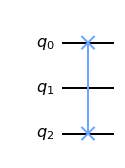

In [16]:
Circuito = QuantumCircuit(3)
Circuito.swap(0,2)
Circuito.draw("mpl")

Esto, sin afectar el qubit de la primera posición.

**Compuerta general en un qubit**

Visto anteriormente, algunas compuertas que se pueden aplicar en un qubit pero estas se pueden generalizar en una sola compuerta llamada **Compuerta U** o **compuerta general**, denotada de la siguiente manera:
\begin{equation}
\textbf{U}(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\ e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2}) \end{bmatrix},
\end{equation}
para todo  $0\leq\theta\leq\pi$, $0\leq \phi<2\pi$ y $0\leq \lambda<2\pi$. Donde $\theta$, $\phi$ y $\lambda$ son los ángulos de Euler. Sí tomamos los siguientes ángulos, podemos obtener ciertas matrices mencionadas anteriormente, es decir:
\begin{equation}
\textbf{H}=\textbf{U}(\frac{\pi}{2}, 0, \pi ) = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\
1 & -1 
\end{bmatrix},
\end{equation}

\begin{equation}
\textbf{X}=\textbf{U}(\pi, 0, \pi ) = \begin{bmatrix}
0 & 1\\
1 & 0 
\end{bmatrix},
\end{equation}

\begin{equation}
\textbf{Y}=\textbf{U}(\pi, \frac{pi}{2}, \frac{pi}{2} ) = \begin{bmatrix}
0 & -i\\
i & 0 
\end{bmatrix},
\end{equation}

\begin{equation}
\textbf{Z}=\textbf{U}(0, 0, \pi ) = \begin{bmatrix}
1 & 0\\
0 & -1 
\end{bmatrix},
\end{equation}
\begin{equation}
\textbf{I}=\textbf{U}(0, 0, 0 ) = \begin{bmatrix}
1 & 0\\
0 & 1 
\end{bmatrix}.
\end{equation}
Aún así, con la compuerta $\textbf{U}$, se pueden obtener más operadores importantes que generar cambios en un qubit.

El uso de la compuerta $\textbf{U}$ en qiskit mediante el método **u()**, donde, el primer parámetro es el ángulo $\theta$, el segundo parámetro es el ángulo $\phi$, el tercer parámetro es el ángulo $\lambda$ y el cuarto parámetro es la posición de qubit, es decir, por ejemplo si deseamos obtener la compuerta $\textbf{H}$ mediante la compuerta $\textbf{u}$, aplicamos los ángulos correspondientes vistos anteriormente dentro del método **u()** tal que:

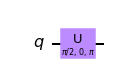

In [15]:
Circuito = QuantumCircuit(1)
Circuito.u(np.pi/2, 0, np.pi, 0)
Circuito.draw("mpl")

In [17]:
estado = Statevector.from_int(0,2**1)
estado = estado.evolve(Circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

Que es lo mismo que aplicar directamente el método **h()** al qubit de la posición $0$. 

Además de las compuertas vistas anteriormente con la compuerta $\textbf{U}$ se pueden obtener más compuertas útiles. Si deseamos generar una superposición de los estados base $\left|0\right\rangle$ y $\left|1\right\rangle$ con amplitudes de probabilidad por cada base que queramos mediante los ángulos $\phi$ y $\lambda$, podemos usar la siguente compuerta con $\theta=\frac{\pi}{2}$:

\begin{equation}
\textbf{U}(\frac{\pi}{2}, \phi, \lambda) =\textbf{U}_{2}(\phi, \lambda)= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & -e^{i\lambda} \\ e^{i\phi} & e^{i(\phi+\lambda)} \end{bmatrix},
\end{equation}

con esto, podemos generar un vector estado cualquiera dentro de la esfera de Bloch. Para usarlo en Qiskit usamos el método **u2()** donde el primer parámetro es el ángulo $\phi$, el segundo parámetro es $\lambda$ y el tercer parámetro la posición del qubit al cual le deseamos aplicar el operador. Por ejemplo, para $\phi=\frac{\pi}{3}$ y $\lambda=\frac{\pi}{4}$ obtenemos el siguiente vector estado:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  


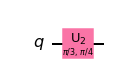

In [10]:
circuito = QuantumCircuit(1)
circuito.u2(np.pi/3,np.pi/4,0)
circuito.draw("mpl")

In [11]:
estado = Statevector.from_int(0,2**1)
estado = estado.evolve(circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

el método **u2()** en futuras actualizaciones dejará de estar dentro de la librería, con lo cual, una alternativa para usar la compuerta $\textbf{U}_{2}$ es mediante la compuerta $\textbf{U}$, tal que :

In [18]:
Circuito = QuantumCircuit(1)
Circuito.u(np.pi/2, np.pi/3,np.pi/4,0)
estado = Statevector.from_int(0,2**1)
estado = estado.evolve(circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

Otra compuerta que se puede obtener de la compuerta $\textbf{U}$, es la compuerta que aplica una fase al vector estado, más especificamente se aplica una fase en el estado base $\left|1\right\rangle$. Esta se obtiene aplicando un ángulo $\theta=0$, un ángulo $\phi=0$ y siendo el ángulo de fase arbitrario $\lambda$, tal que:
\begin{equation}
\textbf{U}(0, 0, \lambda) = \textbf{P}(\lambda)= \begin{bmatrix} 1 & 0 \\ 0 & e^{i\lambda} \end{bmatrix},
\end{equation}
donde $\textbf{P}$ es la  compuerta que aplica una fase arbitraria $\lambda$. De esta compuerta también se puede obtener la compuerta de Pauli Z de la siguiente forma:
\begin{equation}
\textbf{Z} = \textbf{P}(\pi)= \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix},
\end{equation}
es decir que la compuerta Z aplica una fase con un ángulo de $\pi$ al estado. Para usar la compuerta $\textbf{P}$, llamamos al método **p()**, donde el primer parámetro es el ángulo de fase y el segundo parámetro es la posición de qubit, es decir:

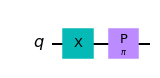

In [26]:
Circuito = QuantumCircuit(1)
Circuito.x(0) #dado que p es aplicado únicamente en el estado |1>, entonces aplicamos la compuerta x a |0>
Circuito.p(np.pi,0)
Circuito.draw("mpl")

In [27]:
estado = Statevector.from_int(0,2**1)
estado = estado.evolve(Circuito)
estado.draw("latex")

<IPython.core.display.Latex object>

Dado que ahora sabemos que la compuerta **Z** aplica una fase de $\pi$ al estado, ahora, si deseamos aplicar la mitad de la fase, es decir, $\frac{\pi}{2}$ podemos construir una nueva compuerta mediante la compuerta **P** de tal manera que:
\begin{equation}
\textbf{S} = \textbf{P}(\frac{\pi}{2})= \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix},
\end{equation}
donde $\textbf{S}$ aplica una fase al estado vector de $\frac{pi}{2}$. Sí aplicamos dos veces $\textbf{S}$ al vector estado $\left|q\right\rangle$ es lo mismo que aplicar **Z** una vez, es decir: 
\begin{equation}
\textbf{SS}\left|q\right\rangle = \textbf{Z}\left|q\right\rangle,
\end{equation}
dado a lo anterior $\textbf{S}$ también es denotado como $\sqrt{\textbf{Z}}$. Sí deseamos aplicar una fase de $-\frac{pi}{2}$, es decir, en el sentido contrario a la compuerta **S**, simplemente aplicamos el operador daga a **S** tal que:
\begin{equation}
\textbf{S}^\dagger =  \begin{bmatrix} 1 & 0 \\ 0 & -i \end{bmatrix},
\end{equation}
con esto, sí aplicamos **S** al vector estado $\left|q\right\rangle$ y luego $\textbf{S}^\dagger$, es lo mismo que aplicar el operador identidad, es decir: 
\begin{equation}
\textbf{S}^{\dagger}\textbf{S}\left|q\right\rangle = \textbf{I}\left|q\right\rangle.
\end{equation}

También podemos aplicar la mitad de fase que aplica **S** a un vector estado, o sea, un ángulo de $\frac{pi}{4}$ tal que obtenemos lo siguiente:

\begin{equation}
\textbf{T} = \textbf{P}(\frac{\pi}{4})= \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix},
\end{equation}
Donde **T** es la compuerta que aplica una fase a un vector estado $\left|q\right\rangle$  de $\frac{\pi}{4}$, y también es denotada como  $\sqrt{\textbf{S}}$, debido a lo siguiente:
\begin{equation}
\textbf{TT}\left|q\right\rangle = \textbf{S}\left|q\right\rangle.
\end{equation}
Así como sucede con la compuerta **S**, también podemos aplicar una fase de $-\frac{\pi}{4}$ aplicando el operador daga a **T**, tal que:

\begin{equation}
\textbf{T}^{\dagger} = \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{bmatrix}.
\end{equation}

Para usar $\textbf{S}$ en Qiskit usamos el método **s()**, donde, el parámetro a ingresar es la posición de qubit. Con $\textbf{S}^{\dagger}$ usamos el método **sgd()**, donde el parámetro a inglesar también es la posición de qubit. Con $\textbf{T}$ y $\textbf{T}^{\dagger}$ usamos los métodos  **t()** y **tdg()** respectivamente y el parámetro a ingresar es la posición de qubit. Dichos operadores son usados de la siguente manera en la siguente celda:

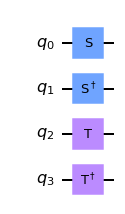

In [30]:
circuito = QuantumCircuit(4)
circuito.s(0)
circuito.sdg(1)
circuito.t(2)
circuito.tdg(3)
circuito.draw("mpl")

Las anteriores compuertas vistas son útiles para generar nuevas compuertas, por ejemplo, sabemos que la compuerta **CNOT** aplica una compuerta $\textbf{X}$, dada unas condiciones dadas como vimos anteriormente, pero, si deseamos generar una compuerta condiciónal que funcione como **CNOT** pero que aplique $\textbf{Y}$, entonces podemos usar $\textbf{S}$ y $\textbf{S}^{\dagger}$, tal que: 
\begin{equation}
\textbf{S}\textbf{X}\textbf{S}^{\dagger} = \textbf{Y}
\end{equation}
esto quiere decir que el circuito queda de la siguiente manera en Qiskit:

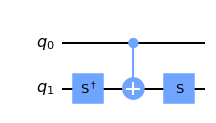

In [32]:
circuito = QuantumCircuit(2)
circuito.sdg(1)
circuito.cx(0,1)
circuito.s(1)
circuito.draw("mpl")

eso lo que quiere decir es que si se cumplen las condiciones de **CNOT** se aplica $\textbf{X}$, pero como aplicamos al inicio y al final respectivamente $\textbf{S}$ y $\textbf{S}^{\dagger}$, entonces se aplica es $\textbf{Y}$ si se cumple la condición de **CNOT**. 

**Operadores condicionales**

Sabemos que podemos cambiar el estado vector de un qubit en especifico mediante las condiciones dadas por el qubit de control que uno aplique como en este caso sucede con la compuerta **CNOT**, en este caso también podemos generar "operadores" los cuales se manejen dadas las condiciones de un bit, es decir, dadas las condiciones de una medición hecha. en este caso usamos el método **c_if()**, donde el primer parámetro tiene en cuenta la posición del bit asociado a la medición y el segundo parámetro es el qubit al cual se le generar la condición. Si el bit contiene la mide efectivamente el estado base $\left|0\right\rangle$, es decir, el bit es 0, significa que se debe generar la condición al qubit elegido, si se mide efectivamente el estado base $\left|1\right\rangle$, entonces no hace nada. Es de aclarar que no se puede aplicar operador de condición si el qubit ha sido medido, ya que el estado vector ha colapsado por la medición hecha, con lo cual el qubit medido y el qubit al cual se le aplica la condición deben ser distintos. 
Por ejemplo, tenemos un sistema con dos qubits, al primer qubits aplicamos el operador Hadamard, es decir que al medir dicho qubit, obtendremos una probabilidad del $50\%$ de medir, alguno de los dos vectores base, entonces, para el otro qubit aplicamos la siguiente condición: si al anterior qubit al hacer la medición obtenemos $\left|0 \right \rangle$, entonces aplicamos al segundo qubit la compuerta $\textbf{X}$, caso contrario no hace nada. Dicho ejemplo anterior queda escrito en Python de la siguiente forma:

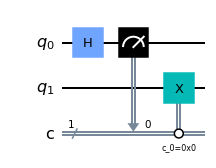

In [38]:
circuito = QuantumCircuit(2,1) #2 qubits, 1 bit asociado a la medición del qubit de posicion 0.
circuito.h(0) #aplicar Hadamard.
circuito.measure(0,0) #medir que qubit de la posición 0 y alojar el resultado en el bit 0.
circuito.x(1).c_if(0,0) #aplicar x al qubit de la posición 0 sí el bit de la posición del bit 0 es 0.
circuito.draw("mpl")
 